In [39]:
import pandas as pd
import numpy as np

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [62]:
import sqlite3
connection = sqlite3.connect("../db.sqlite3")
cursor = connection.cursor()

sql_query = "SELECT ROW_NUMBER() OVER() AS id, order_id, datetime, ro.id AS item_id, quantity, product_id, price, name FROM restaurant_order JOIN restaurant_orderitem AS ro on restaurant_order.id = ro.order_id JOIN restaurant_product AS rp on rp.id = ro.product_id"

cursor.execute(sql_query)
orders = cursor.fetchall()
column_names = [i[0] for i in cursor.description] 

connection.close()

import csv
with open("../orders.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(column_names)
    writer.writerows(orders)
    
print(f"sql rows= {len(orders)}")

df = pd.read_csv("../orders.csv", index_col=0)
print(df.count())

sql rows= 74818
order_id      74818
datetime      74818
item_id       74818
quantity      74818
product_id    74818
price         74818
name          74818
dtype: int64


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

Text(0.5, 1.0, 'Top 10 products by quantity')

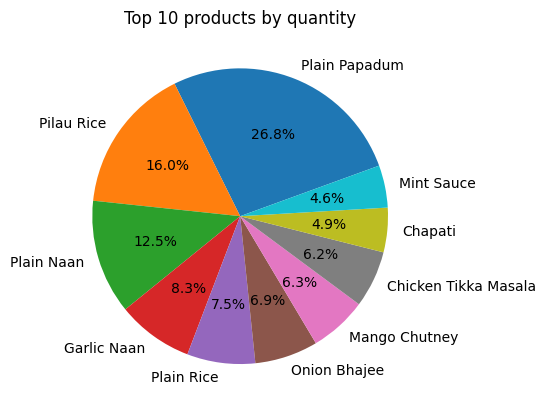

In [169]:
import matplotlib.pyplot as plt
%matplotlib inline

prod = df.groupby(["name"], as_index=False).agg({"quantity": "sum"}).sort_values(
    "quantity", ascending=False)

plt.pie(prod["quantity"][:10], labels=prod["name"][:10], autopct='%1.1f%%', startangle=20)
plt.title("Top 10 products by quantity")

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

Text(0.5, 1.0, 'Top 10 products by item price')

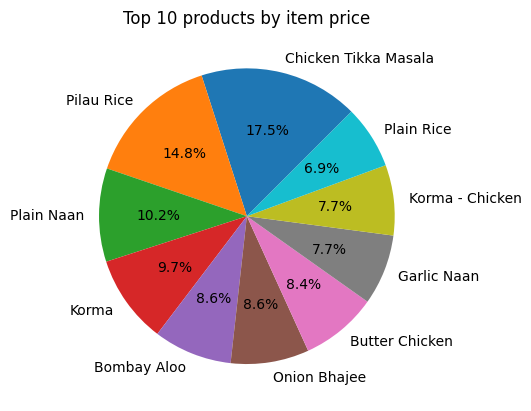

In [155]:
df["item price"] = df["price"] * df["quantity"]

prod = df.groupby(["name"], as_index=False).agg(
    {"item price": "sum"}).sort_values("item price", ascending=False)

plt.pie(prod["item price"][:10], labels=prod["name"][:10], autopct='%1.1f%%', startangle=45)
plt.title("Top 10 products by item price")

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

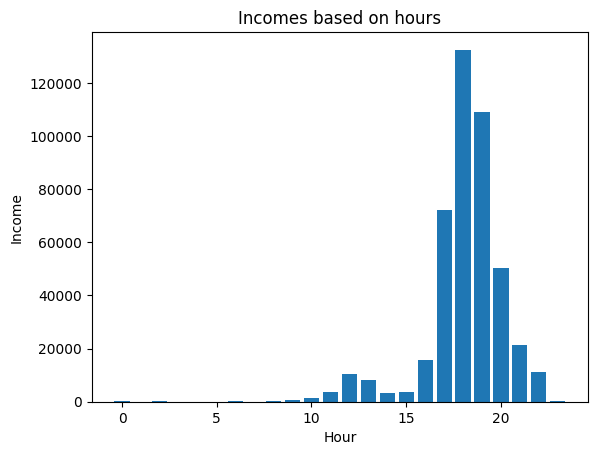

In [158]:
df["order hour"] = pd.to_datetime(df["datetime"]).dt.hour

prod = df.groupby(["order hour"], as_index=False).agg(
    {"item price": "sum"}).sort_values("item price", ascending=False)

plt.bar(prod["order hour"], prod["item price"])
plt.xlabel('Hour')
plt.ylabel('Income')
plt.title('Incomes based on hours')
plt.show()


# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

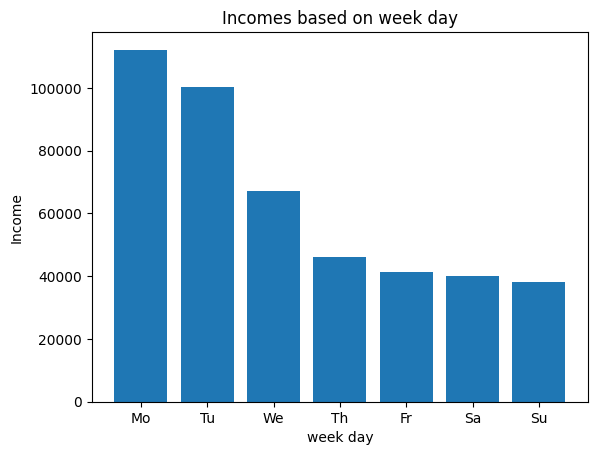

In [168]:
df["week day"] = pd.to_datetime(df["datetime"]).dt.weekday
weekdays = pd.Series(["Mo", "Tu", "We", "Th", "Fr", "Sa", "Su"])

prod = df.groupby(["week day"], as_index=False).agg(
    {"item price": "sum"}).sort_values("item price", ascending=False)

plt.bar(weekdays, prod["item price"])
plt.xlabel('week day')
plt.ylabel('Income')
plt.title('Incomes based on week day')
plt.show()